In [65]:
import pandas as pd
import yfinance as yf
from FinMind.data import DataLoader
import matplotlib.pyplot as plt
import mplfinance as mpf
import matplotlib as mpl
import requests as req
from bs4 import BeautifulSoup as bs

In [ ]:
from FinMind.data import DataLoader
api = DataLoader()
df = api.taiwan_stock_info() # 取得台灣股票資訊

2025-11-27 19:18:26.147 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockInfo, data_id: 


In [19]:
df.columns

Index(['industry_category', 'stock_id', 'stock_name', 'type', 'date'], dtype='object')

In [21]:
df.head()

,industry_category,stock_id,stock_name,type,date
0,光電業,3629,地心引力,tpex,2020-06-03
1,電子零組件業,5481,新華,tpex,2020-06-03
2,文化創意業,3687,歐買尬,tpex,2020-06-03
3,電腦及週邊設備業,5450,寶聯通,tpex,2020-06-03
4,其他電子類,6238,勝麗,tpex,2020-06-13


In [52]:
filtercondition = (df['industry_category'].str.contains('ETF')) & df['stock_id'].str.contains('0050')

choice_sr = df[filtercondition]['stock_id']
[i + '.TW' for i in choice_sr][:5]

['0050.TW']

C:\Users\say08\AppData\Local\Temp\ipykernel_13736\1474771240.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start = '2015-01-01')
[*********************100%***********************]  1 of 1 completed
C:\Users\say08\AppData\Local\Temp\ipykernel_13736\1474771240.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start = '2015-01-01')
[*********************100%***********************]  1 of 1 completed
C:\Users\say08\AppData\Local\Temp\ipykernel_13736\1474771240.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start = '2015-01-01')
[*********************100%***********************]  1 of 1 completed
C:\Users\say08\AppData\Local\Temp\ipykernel_13736\1474771240.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start = '2015-01-01')
[****************

<Figure size 1600x800 with 0 Axes>

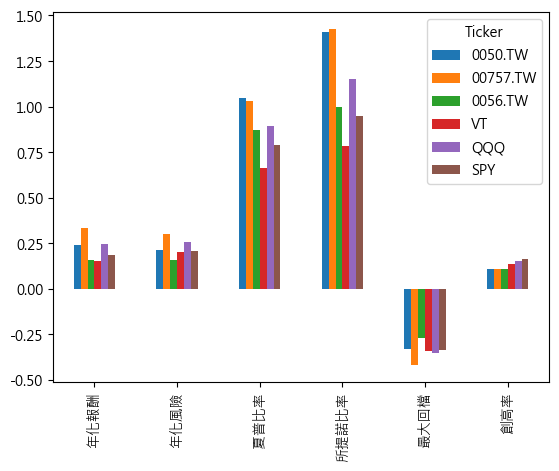

In [ ]:
def stock_performance(s):
    plt.rcParams['font.family'] = ['Microsoft JhengHei']
    mpl.rcParams['axes.unicode_minus'] = False 

    df_s = []
    for symbol in symbols:
        df = yf.download(symbol, start = '2015-01-01')
        df_s.append(df)
    df = pd.concat(df_s, axis = 1)

    ret = df['Close'].dropna().pct_change(periods = 1)
    yr_day_cnt = df.index.year.value_counts().mean() # 每年平均天數
    ret = df['Close'].dropna().pct_change(periods = 1)
    
    ret_yearly = ret.mean() * yr_day_cnt
    ret_yearly.transpose().plot
    std_yrly = ret.std() * (yr_day_cnt ** 0.5)
    sharp_yearly = (ret_yearly - 0.02) / std_yrly
    bad_std_yr = ret[ret.lt(0)].std() * (yr_day_cnt ** 0.5)
    sortino_yr = (ret_yearly - 0.02) / bad_std_yr
    mdd = ( (ret+1).cumprod() / (ret+1).cumprod().cummax() -1 ).min()
    newhigh = ((ret+1).cumprod() / (ret+1).cumprod().cummax()) == 1 
    newhigh[ret.isna()] = None
    new_high = newhigh.mean()
    kpi_s = []
    kpi_s.append(ret_yearly)
    kpi_s.append(std_yrly)
    kpi_s.append(sharp_yearly)
    kpi_s.append(sortino_yr)
    kpi_s.append(mdd)
    kpi_s.append(new_high)
    kpi_table = pd.concat(kpi_s,axis=1)
    kpi_table.columns = ['年化報酬','年化風險','夏普比率','所提諾比率','最大回檔','創高率']
    # kpi_table.plot.bar()
    
    kpi_table.transpose().plot.bar()


filtercondition = (df['industry_category'].str.contains('ETF')) & df['stock_name'].str.contains('ESG')
choice_sr = df[filtercondition]['stock_id'].tolist()[:5]
symbols = [i + '.TW' for i in choice_sr]
symbols = [
    '0050.TW',
    '00757.TW',
    '0056.TW',
    'VT', 
    'QQQ', 
    'SPY'
]
plt.figure(figsize = (16, 8))
stock_performance(symbols)
plt.show()

In [38]:
# [i for i in range(1, 101) if (i & 1) == 0] # 偶數陣列
# [i for i in range(1, 101) if (i & 1) != 0] # 奇數陣列
# [i + 1 for i in range(100)] # 1 - 100的陣列

# 巢狀迴圈
[f'{i} * {j} = {i * j}' for i in range(1, 10) for j in range(1, 10)]

['1 * 1 = 1',
 '1 * 2 = 2',
 '1 * 3 = 3',
 '1 * 4 = 4',
 '1 * 5 = 5',
 '1 * 6 = 6',
 '1 * 7 = 7',
 '1 * 8 = 8',
 '1 * 9 = 9',
 '2 * 1 = 2',
 '2 * 2 = 4',
 '2 * 3 = 6',
 '2 * 4 = 8',
 '2 * 5 = 10',
 '2 * 6 = 12',
 '2 * 7 = 14',
 '2 * 8 = 16',
 '2 * 9 = 18',
 '3 * 1 = 3',
 '3 * 2 = 6',
 '3 * 3 = 9',
 '3 * 4 = 12',
 '3 * 5 = 15',
 '3 * 6 = 18',
 '3 * 7 = 21',
 '3 * 8 = 24',
 '3 * 9 = 27',
 '4 * 1 = 4',
 '4 * 2 = 8',
 '4 * 3 = 12',
 '4 * 4 = 16',
 '4 * 5 = 20',
 '4 * 6 = 24',
 '4 * 7 = 28',
 '4 * 8 = 32',
 '4 * 9 = 36',
 '5 * 1 = 5',
 '5 * 2 = 10',
 '5 * 3 = 15',
 '5 * 4 = 20',
 '5 * 5 = 25',
 '5 * 6 = 30',
 '5 * 7 = 35',
 '5 * 8 = 40',
 '5 * 9 = 45',
 '6 * 1 = 6',
 '6 * 2 = 12',
 '6 * 3 = 18',
 '6 * 4 = 24',
 '6 * 5 = 30',
 '6 * 6 = 36',
 '6 * 7 = 42',
 '6 * 8 = 48',
 '6 * 9 = 54',
 '7 * 1 = 7',
 '7 * 2 = 14',
 '7 * 3 = 21',
 '7 * 4 = 28',
 '7 * 5 = 35',
 '7 * 6 = 42',
 '7 * 7 = 49',
 '7 * 8 = 56',
 '7 * 9 = 63',
 '8 * 1 = 8',
 '8 * 2 = 16',
 '8 * 3 = 24',
 '8 * 4 = 32',
 '8 * 5 = 40',
 '

In [72]:
# 爬取全世界的指數資料
url = r'https://finance.yahoo.com/markets/world-indices/'
hd = {'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/142.0.0.0 Safari/537.36'}
res = req.get(url, headers = hd, timeout = 10)

In [73]:
res.status_code

200

In [80]:
dff = pd.read_html(res.text)
df = dff[0]

C:\Users\say08\AppData\Local\Temp\ipykernel_13736\3702913360.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dff = pd.read_html(res.text)


In [81]:
df

,Symbol,Name,Unnamed: 2,Price,Change,Change %,Volume,Day Range,52 Wk Range
0,^GSPC,S&P 500,NaN,"6,812.61 +46.73 (+0.69%)",46.73,+0.69%,2.725B,"6,783.87 6,831.44","4,835.04 6,920.34"
1,^DJI,Dow Jones Industrial Average,NaN,"47,427.12 +314.67 (+0.67%)",314.67,+0.67%,458.137M,"47,196.15 47,571.40","36,611.78 48,431.57"
2,^IXIC,NASDAQ Composite,NaN,"23,214.69 +189.10 (+0.82%)",189.10,+0.82%,6.377B,"23,074.39 23,280.58","14,784.03 24,019.99"
3,^NYA,NYSE Composite Index,NaN,"21,713.13 +161.39 (+0.75%)",161.39,+0.75%,0,0.00 0.00,"0.00 21,876.99"
4,^XAX,NYSE American Composite Index,NaN,"7,404.12 +103.15 (+1.41%)",103.15,+1.41%,0,0.00 0.00,"0.00 7,464.69"
5,^BUK100P,Cboe UK 100,NaN,969.59 -0.18 (-0.02%),-0.18,-0.02%,0,966.81 970.86,751.90 991.30
6,^RUT,Russell 2000 Index,NaN,"2,486.12 +20.14 (+0.82%)",20.14,+0.82%,0,"2,464.71 2,502.96","1,732.99 2,541.67"
7,^VIX,CBOE Volatility Index,NaN,17.11 -0.08 (-0.47%),-0.08,-0.47%,0,17.05 17.22,12.70 60.13
8,^FTSE,FTSE 100,NaN,"9,684.61 -6.97 (-0.07%)",-6.97,-0.07%,0,"9,658.86 9,699.82","7,544.80 9,930.10"
9,^GDAXI,DAX P,NaN,"23,788.03 +61.81 (+0.26%)",61.81,+0.26%,0,"23,708.42 23,830.97","18,489.91 24,771.34"
